In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sym
from scipy.integrate import quad
from scipy.integrate import dblquad

In [2]:
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)

a = 0.
b = x[-1]

R = 1

In [3]:
def f(x,y,R=1.):
    
    z = R**2 - x**2 - y**2
    
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)

In [4]:
f = np.vectorize(f)

In [5]:
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

<IPython.core.display.Javascript object>


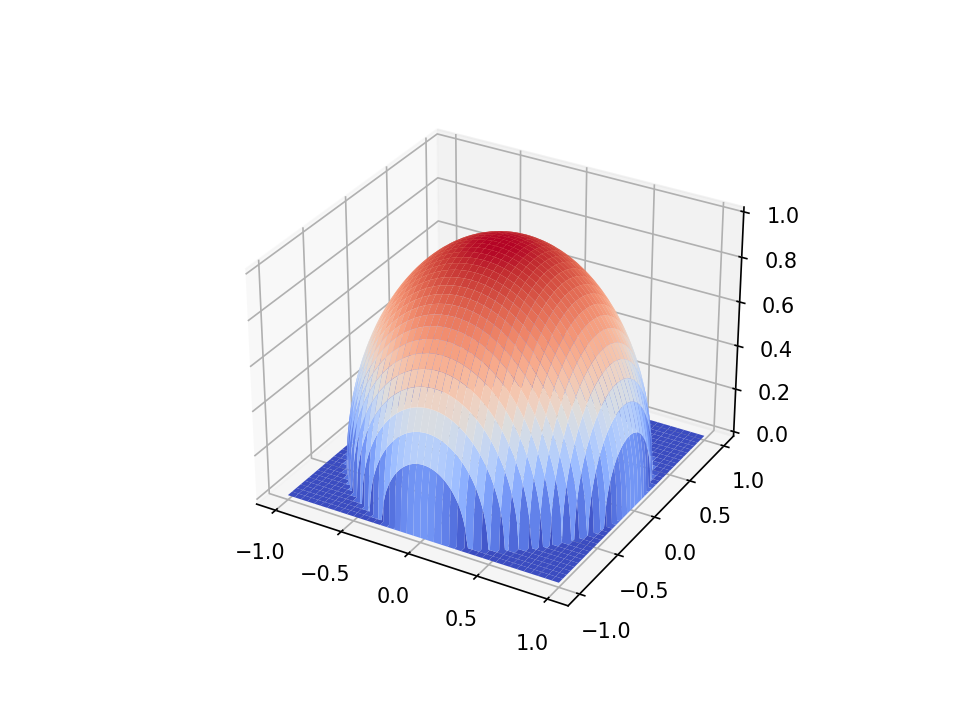

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap='coolwarm')

In [8]:
def f2(x,y):
    return 2*np.pi*x

In [10]:
integral = dblquad(f2, a, b, lambda y: 0, lambda y: np.sqrt(R**2 - y**2))
print(integral,2*np.pi/3.)

(2.0943951023931953, 3.4878520525055084e-14) 2.0943951023931953


In [24]:
x1 = sym.Symbol('x',real=True)
y1 = sym.Symbol('y',real=True)
F = sym.exp(-x1)*x1**(3)*sym.sin(y1)
F

x**3*exp(-x)*sin(y)

In [25]:
a = 0.
b = np.pi/2
I = sym.integrate( F,(x1,0,sym.oo),(y1,a,b) )
I

6.00000000000000